# Example of clustering with $k$-means

### Raul Almuzara

-----------------------------------------------

Methodology for partitioning a dataset into clusters using the $k$-means algorithm. First, we will determine the optimal number of clusters using the elbow method with the inertias of several models with different values of $k$. Then, we will visualize the partitions provided by the algorithm with different seeds to check the convergence of the method to similar clusters and centroids. Finally, we will predict the cluster that would correspond to new points. The KMeans implementation from scikit-learn has been used.

------------------------------------------------

### Preprocessing and exploratory data analysis

Libraries

In [1]:
import numpy as np #version 1.24.3
import matplotlib.pyplot as plt #version 3.7.1
import pandas as pd #version 2.0.1
from sklearn.cluster import KMeans #version 1.3.0
import warnings
warnings.filterwarnings('ignore')

Data loading

In [2]:
data = pd.read_csv('data-clustering.csv', names=['x','y'])

We have 150 points defined by their two Cartesian coordinates

In [3]:
print(f'Dimension = {data.shape}')

Dimension = (150, 2)


First instances

In [4]:
data.head()

,x,y
0,-0.425522,0.313256
1,-0.870943,0.682632
2,-1.054453,0.919984
3,-1.051189,2.093577
4,0.171462,0.967684


Representation of the 150 points

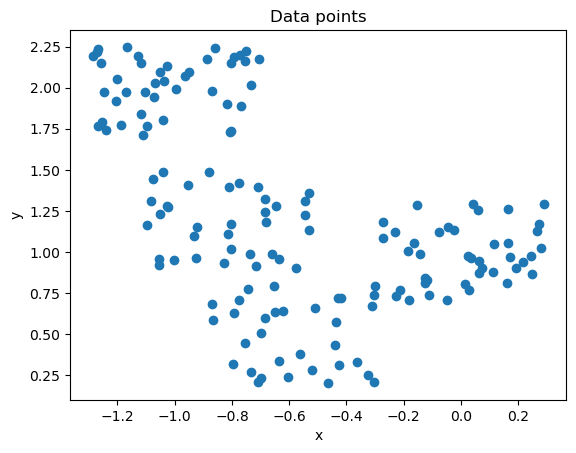

In [5]:
plt.scatter(data['x'], data['y'])
plt.title('Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Elbow method

The $k$-means method requires that we specify the desired number of clusters $k$ as a hyperparameter before running the algorithm. In many cases, if it is not possible to represent the data graphically, it can be difficult to know in advance what the optimal number is. A model with very few clusters may not have enough capacity to provide the best partitioning (underfitting). However, a model with too many clusters may be unnecessarily complex and ignore the true overall structure of the data (overfitting). It is necessary to find a balance through some metric. We define the *inertia* of a $k$-means partition as the sum of squared distances of samples to their closest cluster center (centroid). In general, the inertia decreases as we increase the number of clusters since the presence of more centroids helps to reduce the sum of squared distances of each data point to its nearest centroid. 

The **elbow method** is a heuristic that we can use to determine $k$. When plotting inertia as a function of the number of clusters, the method consists of selecting the number of clusters for which the *elbow* of the graph is obtained. In this case, the inertia of partitions with number of clusters from 1 to 9 has been studied. At first, when we add a few clusters, the inertia decreases rapidly. However, there comes a time when the decrease slows down a lot. At this point, adding more clusters does not give much better modeling of the data and is no longer worth the additional cost. The separation is not always clear, but when it is, it can be a useful criterion.

In [6]:
inertias = []
K = range(1, 10)

for k in K:
    
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data);
    
    inertias.append(model.inertia_)

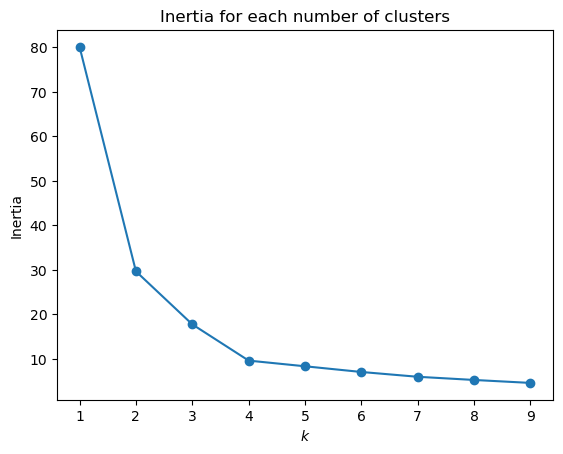

In [7]:
plt.plot(K, inertias, marker = 'o')
plt.title('Inertia for each number of clusters')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.show()

The elbow is at $k=4$ because, from that point on, the inertia starts to decrease very slowly in a linear fashion (the decrease in inertia obtained for higher values of $k$ is not worth the increase in the complexity of the model). Therefore, $k=4$ is the most appropriate number of clusters. However, let us analyze graphically the partitions obtained with the first four values of $k$ with different seeds.

### Visualization of the clustering

The standard $k$-means algorithm follows the following steps:

1. $k$ initial centroids are randomly generated.

2. $k$ clusters are defined by assigning each point to its closest centroid.

3. A new centroid is obtained for each cluster by calculating the mean of the points associated with that cluster in the current iteration.

4. Steps 2 and 3 are repeated until reaching convergence.

We will show the result of this clustering technique for different values of $k$.

For $k=1$:

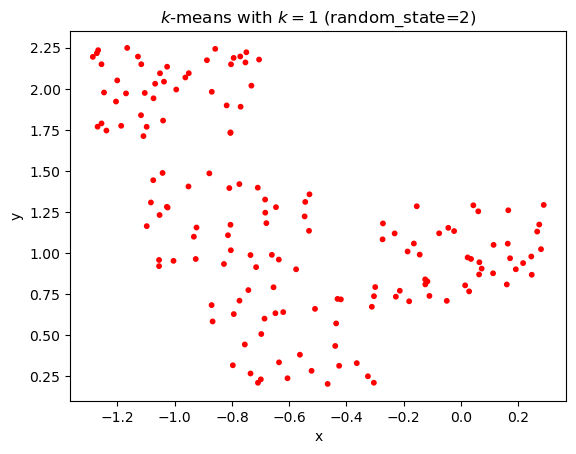

Centroid:
 [[-0.59791616  1.21470043]]


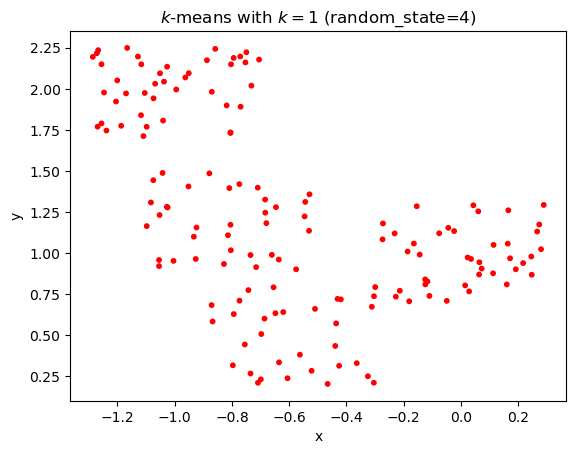

Centroid:
 [[-0.59791616  1.21470043]]


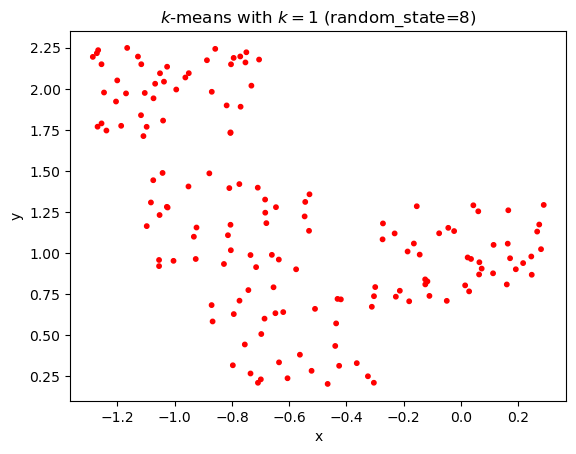

Centroid:
 [[-0.59791616  1.21470043]]


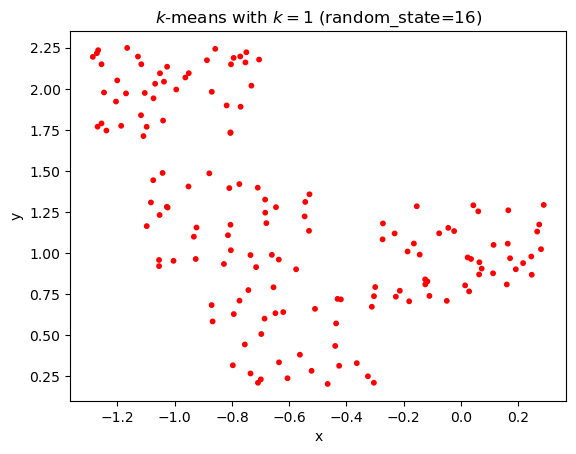

Centroid:
 [[-0.59791616  1.21470043]]


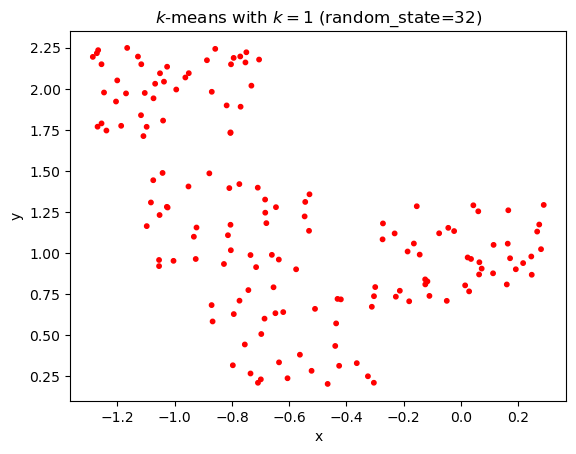

Centroid:
 [[-0.59791616  1.21470043]]


In [8]:
seeds = [2,4,8,16,32]

for s in seeds:

    model1 = KMeans(n_clusters=1, n_init=100, random_state=s)
    
    data1 = data.copy()
    data1['cluster'] = model1.fit_predict(data1[['x','y']])

    centroids = model1.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    data1['cen_x'] = data1.cluster.map({0:cen_x[0]})
    data1['cen_y'] = data1.cluster.map({0:cen_y[0]})

    colors = ['red']
    data1['c'] = data1.cluster.map({0:colors[0]})
    
    plt.scatter(data1.x, data1.y, c=data1.c, s=10)
    plt.title('$k$-means with $k=1$ (random_state='+str(s)+')')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    print(f'Centroid:\n {centroids}')

For $k=2$:

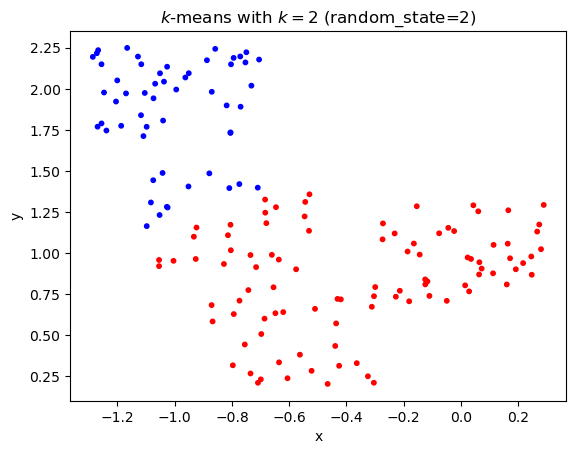

Centroids:
 [[-0.36608518  0.8467282 ]
 [-1.01006013  1.8688733 ]]


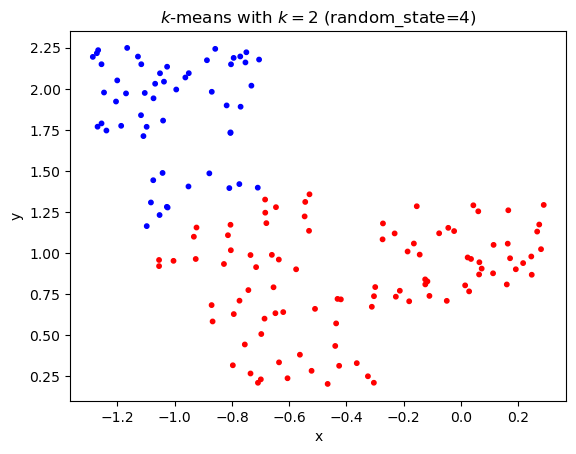

Centroids:
 [[-0.36608518  0.8467282 ]
 [-1.01006013  1.8688733 ]]


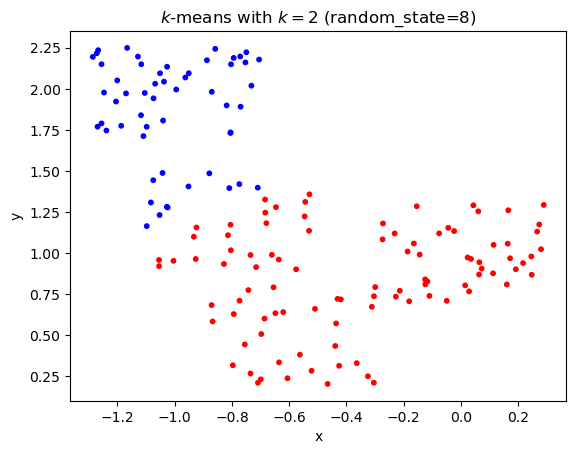

Centroids:
 [[-0.36608518  0.8467282 ]
 [-1.01006013  1.8688733 ]]


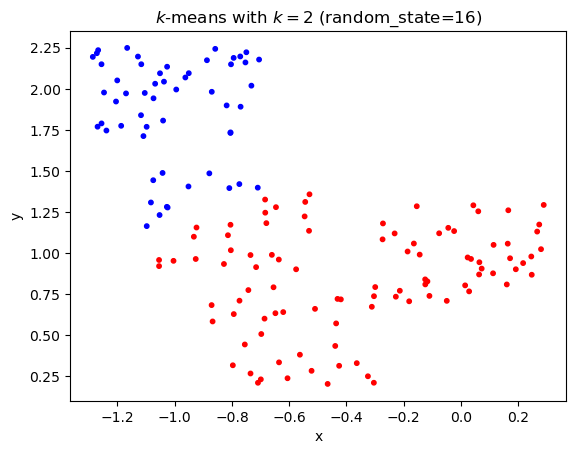

Centroids:
 [[-0.36608518  0.8467282 ]
 [-1.01006013  1.8688733 ]]


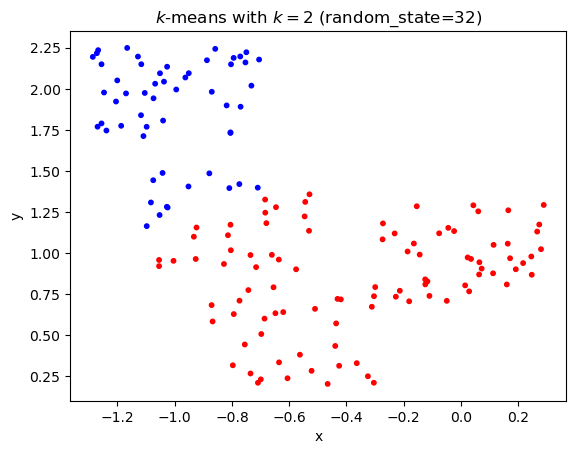

Centroids:
 [[-0.36608518  0.8467282 ]
 [-1.01006013  1.8688733 ]]


In [9]:
seeds = [2,4,8,16,32]

for s in seeds:

    model2 = KMeans(n_clusters=2, n_init=100, random_state=s)
    
    data2 = data.copy()
    data2['cluster'] = model2.fit_predict(data2[['x','y']])

    centroids = model2.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    data2['cen_x'] = data2.cluster.map({0:cen_x[0],1:cen_x[1]})
    data2['cen_y'] = data2.cluster.map({0:cen_y[0],1:cen_y[1]})

    colors = ['red','blue']
    data2['c'] = data2.cluster.map({0:colors[0],1:colors[1]})
    
    plt.scatter(data2.x, data2.y, c=data2.c, s=10)
    plt.title('$k$-means with $k=2$ (random_state='+str(s)+')')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    print(f'Centroids:\n {centroids}')

For $k=3$:

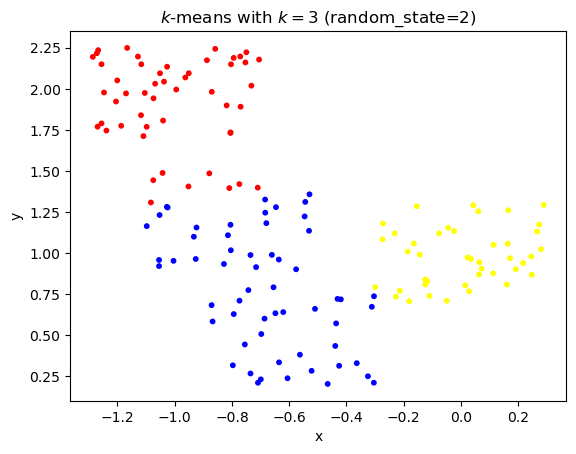

Centroids:
 [[-1.00682569  1.91935153]
 [-0.68320669  0.77757109]
 [ 0.00666307  0.97948489]]


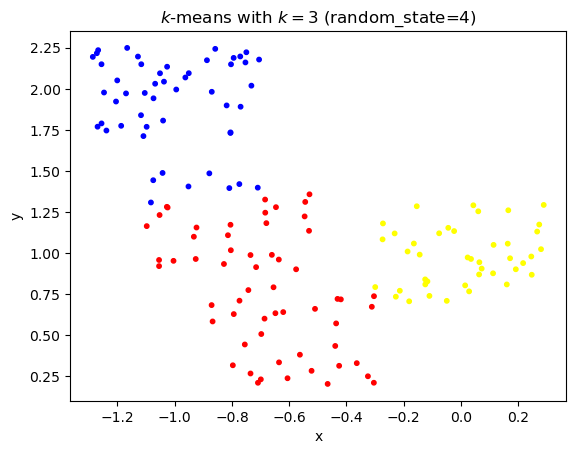

Centroids:
 [[-0.68320669  0.77757109]
 [-1.00682569  1.91935153]
 [ 0.00666307  0.97948489]]


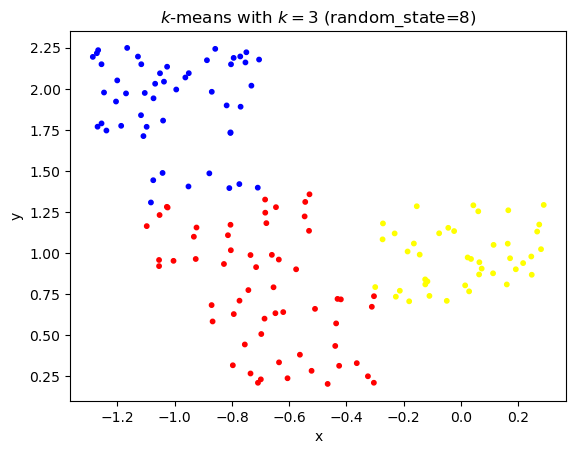

Centroids:
 [[-0.68320669  0.77757109]
 [-1.00682569  1.91935153]
 [ 0.00666307  0.97948489]]


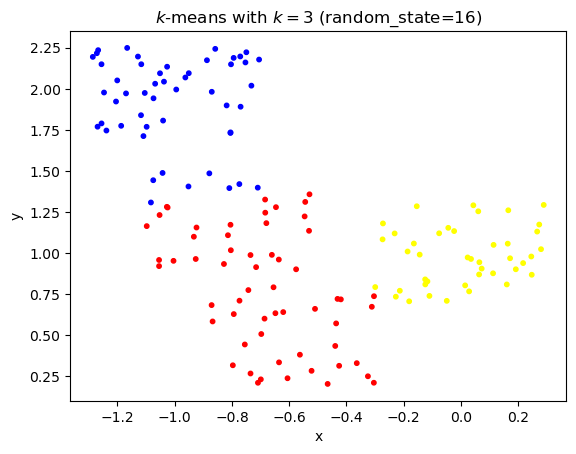

Centroids:
 [[-0.68320669  0.77757109]
 [-1.00682569  1.91935153]
 [ 0.00666307  0.97948489]]


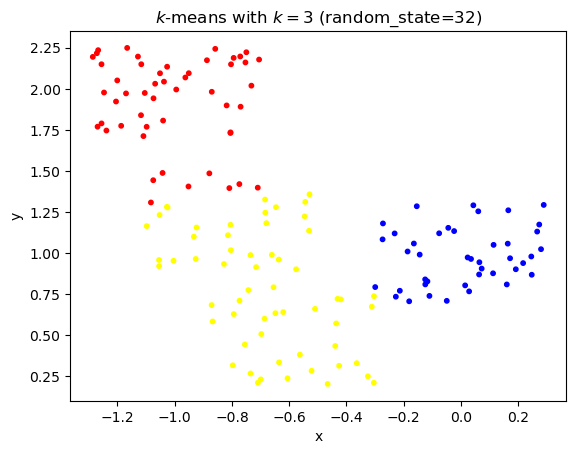

Centroids:
 [[-1.00682569  1.91935153]
 [ 0.00666307  0.97948489]
 [-0.68320669  0.77757109]]


In [10]:
seeds = [2,4,8,16,32]

for s in seeds:

    model3 = KMeans(n_clusters=3, n_init=100, random_state=s)
    
    data3 = data.copy()
    data3['cluster'] = model3.fit_predict(data3[['x','y']])

    centroids = model3.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    data3['cen_x'] = data3.cluster.map({0:cen_x[0],1:cen_x[1],2:cen_x[2]})
    data3['cen_y'] = data3.cluster.map({0:cen_y[0],1:cen_y[1],2:cen_y[2]})

    colors = ['red','blue','yellow']
    data3['c'] = data3.cluster.map({0:colors[0],1:colors[1],2:colors[2]})
    
    plt.scatter(data3.x, data3.y, c=data3.c, s=10)
    plt.title('$k$-means with $k=3$ (random_state='+str(s)+')')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    print(f'Centroids:\n {centroids}')

Finally, the optimal partition with $k=4$:

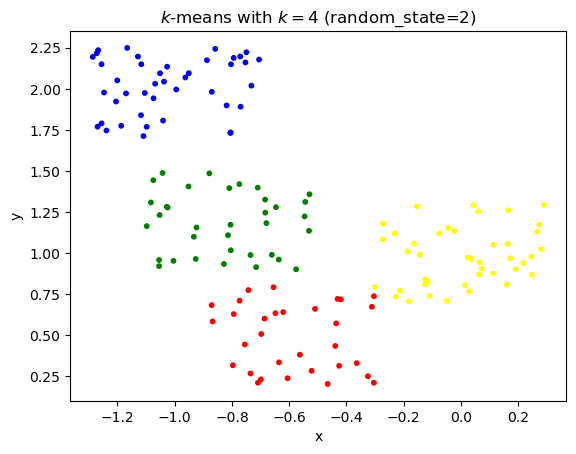

Centroids:
 [[-0.58422738  0.48604053]
 [-1.02423529  2.01500236]
 [ 0.00666307  0.97948489]
 [-0.82395262  1.18198126]]


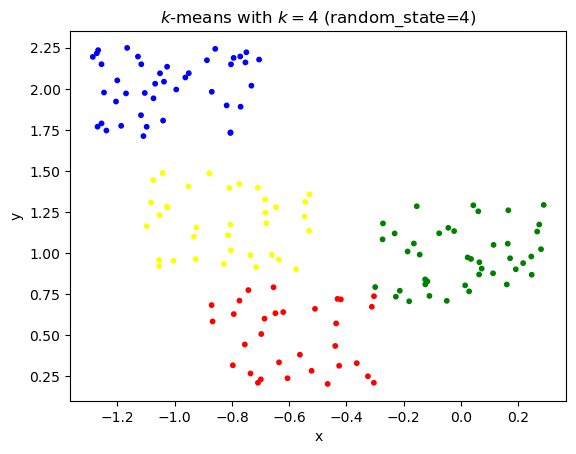

Centroids:
 [[-0.58422738  0.48604053]
 [-1.02423529  2.01500236]
 [-0.82395262  1.18198126]
 [ 0.00666307  0.97948489]]


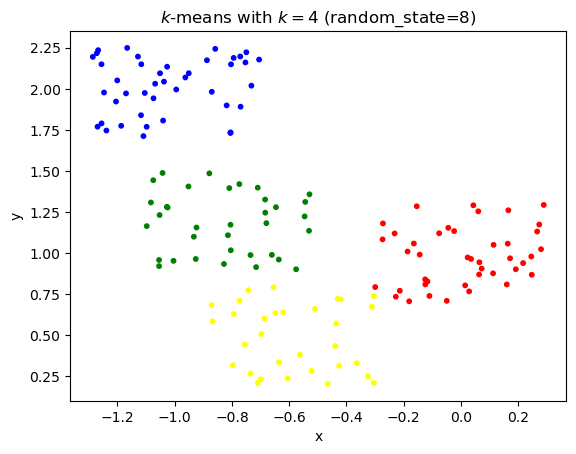

Centroids:
 [[ 0.00666307  0.97948489]
 [-1.02423529  2.01500236]
 [-0.58422738  0.48604053]
 [-0.82395262  1.18198126]]


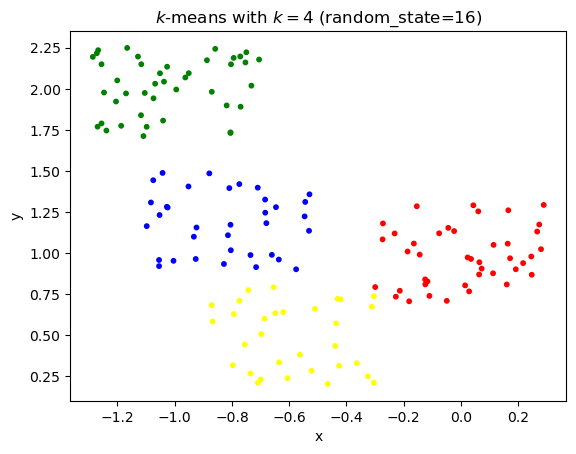

Centroids:
 [[ 0.00666307  0.97948489]
 [-0.82395262  1.18198126]
 [-0.58422738  0.48604053]
 [-1.02423529  2.01500236]]


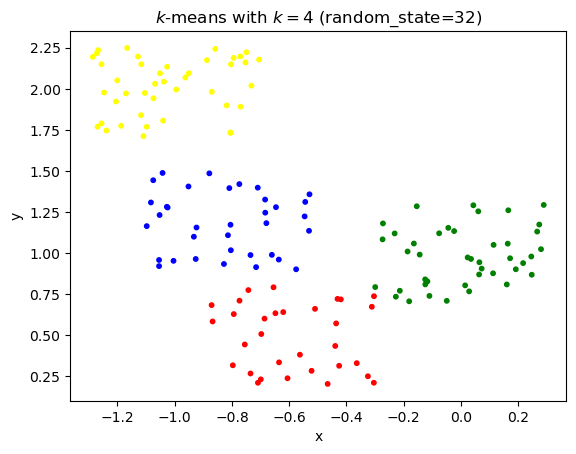

Centroids:
 [[-0.58422738  0.48604053]
 [-0.82395262  1.18198126]
 [-1.02423529  2.01500236]
 [ 0.00666307  0.97948489]]


In [11]:
seeds = [2,4,8,16,32]

for s in seeds:
    
    model4 = KMeans(n_clusters=4, n_init=100, random_state=s)
    
    data4 = data.copy()
    data4['cluster'] = model4.fit_predict(data4[['x','y']])

    centroids = model4.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    data4['cen_x'] = data4.cluster.map({0:cen_x[0],1:cen_x[1],2:cen_x[2],3:cen_x[3]})
    data4['cen_y'] = data4.cluster.map({0:cen_y[0],1:cen_y[1],2:cen_x[2],3:cen_y[3]})

    colors = ['red','blue','yellow','green']
    data4['c'] = data4.cluster.map({0:colors[0],1:colors[1],2:colors[2],3:colors[3]})
    
    plt.scatter(data4.x, data4.y, c=data4.c, s=10)
    plt.title('$k$-means with $k=4$ (random_state='+str(s)+')')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    print(f'Centroids:\n {centroids}')

Depending on the seed, the position of the centroids in the first iteration is different. However, in the end, the method is always converging to the same final centroids and clusters, although they can be listed in a different order. The order of the centroids is the order in which the colors are written in the code. That is, the red points belong to cluster 0, the blue points belong to cluster 1, the yellow points belong to cluster 2 and the green points belong to cluster 3.

### Assigning a cluster to a new point

We can also use the models to predict the cluster that would correspond to any new point based on which is its closest centroid. For example, let us use the model that produced the last plot with $k=4$ and random_state=32. For each point in the dataset, the cluster to which it belongs, the coordinates of the centroid of the cluster and the associated color are stored in the following dataframe:

In [12]:
data4

,x,y,cluster,cen_x,cen_y,c
0,-0.425522,0.313256,0,-0.584227,0.486041,red
1,-0.870943,0.682632,0,-0.584227,0.486041,red
2,-1.054453,0.919984,1,-0.823953,1.181981,blue
3,-1.051189,2.093577,2,-1.024235,-1.024235,yellow
4,0.171462,0.967684,3,0.006663,0.979485,green
...,...,...,...,...,...,...
145,-0.605796,0.237397,0,-0.584227,0.486041,red
146,-0.529110,1.356972,1,-0.823953,1.181981,blue
147,-1.200524,2.050177,2,-1.024235,-1.024235,yellow
148,-0.754973,0.442987,0,-0.584227,0.486041,red


For this model, cluster 0 is the one in the bottom center, cluster 1 is the one in the center on the left, cluster 2 is the one on the top left and cluster 3 is the one in the center on the right. The model would predict that the following points belong to the following clusters:

In [13]:
model4.predict([[-0.7,0.3]])

array([0])

In [14]:
model4.predict([[-0.9,1.1]])

array([1])

In [15]:
model4.predict([[-1.1,2.1]])

array([2])

In [16]:
model4.predict([[-0.1,1.0]])

array([3])